<a href="https://colab.research.google.com/github/KrapaKarthik09/sparks-internship/blob/main/Sparks_internship_supervisedtask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Using Supervised ML

# Importing Libs

In [24]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model



# Data Upload and Details

In [2]:
#Reading the Data
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [4]:
#Knowing the Details on Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#therefore there are no null values in the dataset

# Visualising the Data

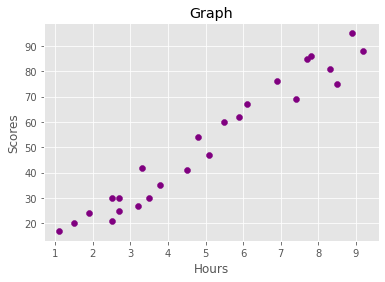

In [13]:
plt.scatter(df["Hours"],df["Scores"],color='purple')
plt.title("Graph")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Preparing the Data

In [14]:
X=df.drop("Scores",axis=1).values#Independent Variable
y=df["Scores"].values#Response Variable

In [16]:
print("The Shape of X->",X.shape)
print("The Shape of y->",y.shape)

The Shape of X-> (25, 1)
The Shape of y-> (25,)


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [22]:
print(X_train)
print("Shape of X_train : ",X_train.shape)

[[8.3]
 [3.3]
 [7.4]
 [5.5]
 [7.7]
 [1.1]
 [4.5]
 [5.9]
 [7.8]
 [6.9]
 [2.7]
 [6.1]
 [8.9]
 [3.5]
 [5.1]
 [4.8]
 [1.9]
 [2.5]
 [8.5]
 [3.2]]
Shape of X_train :  (20, 1)


In [23]:
print(y_train)
print("Shape of y_train : ",y_train.shape)

[81 42 69 60 85 17 41 62 86 76 30 67 95 30 47 54 24 21 75 27]
Shape of y_train :  (20,)


# Linear Reg:Model Fitting

In [26]:
reg = linear_model.LinearRegression() #Creating an Object
reg.fit(X_train,y_train)#fitting onto our training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [9.95819213]


In [37]:
line=reg.coef_*X+reg.intercept_

In [38]:
print(line)

[[26.76622587]
 [52.65752542]
 [33.73696037]
 [86.51537867]
 [36.72441801]
 [16.80803374]
 [93.48611316]
 [56.64080227]
 [84.52374024]
 [28.7578643 ]
 [78.54882496]
 [60.62407912]
 [46.68261014]
 [34.73277958]
 [12.82475689]
 [90.49865552]
 [26.76622587]
 [20.79131059]
 [62.61571755]
 [75.56136732]
 [28.7578643 ]
 [49.67006778]
 [39.71187564]
 [70.58227125]
 [79.54464417]]


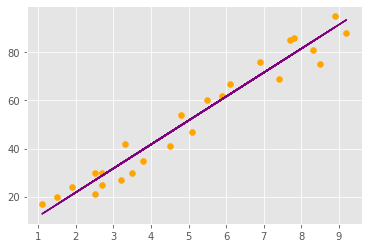

In [39]:
plt.plot(X,line,color='purple')
plt.scatter(X,y,color='orange')
plt.show()

#Scores

In [41]:
y_pred_train = reg.predict(X_train)#Predicting on Train Data
df_train=pd.DataFrame({"Actual": y_train,"Predictions":y_pred_train})
print(df_train)

    Actual  Predictions
0       81    84.523740
1       42    34.732780
2       69    75.561367
3       60    56.640802
4       85    78.548825
5       17    12.824757
6       41    46.682610
7       62    60.624079
8       86    79.544644
9       76    70.582271
10      30    28.757864
11      67    62.615718
12      95    90.498656
13      30    36.724418
14      47    52.657525
15      54    49.670068
16      24    20.791311
17      21    26.766226
18      75    86.515379
19      27    33.736960


In [42]:
print('Bias Score: {}'.format(reg.score(X_train,y_train)))

Bias Score: 0.943706685921912


In [43]:
y_pred_test = reg.predict(X_test)#Predicting on Train Data
df_test=pd.DataFrame({"Actual": y_test,"Predictions":y_pred_test})
print(df_test)

   Actual  Predictions
0      30    26.766226
1      88    93.486113
2      35    39.711876
3      20    16.808034
4      25    28.757864


In [44]:
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Variance score: 0.9714834608072798


# Given Task: Score of Student Studying 9.25 hrs

In [49]:
given_hours=[[9.25]]
task_pred=reg.predict(given_hours)
print("Score Prediction : {} for given {} hours ".format(task_pred[0],given_hours[0][0]))

Score Prediction : 93.98402276410785 for given 9.25 hours 


# Residual Errors

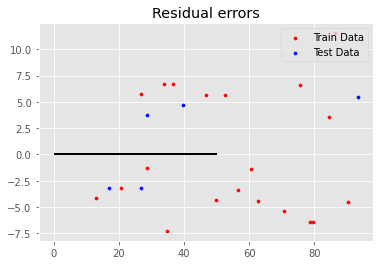

In [36]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Train Data') 

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test Data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) ## plotting line for zero residual error 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 